# Sprint 5 T01. Pruebas de hipótesis.

**<h1>Descripción</h1>** 

**<h3>Estudios de hipótesis con un Dataset de la Liga de football Europea.</h3>**

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Aplicar test de hipótesis al dataset suministrado e interpretar los resultados.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Descarga el dataset adjunto de datos oficiales de la UEFA y seleccionar un atributo del conjunto de datos. Calcular el p-valor y verificar si se rechaza la hipótesis nula escogiendo un alfa de 5%. 
 
 **Ejercicio 2** : Seleccionar otros dos atributos del conjunto de datos. Calcular los p-valores y verificar si se rechazan la hipótesis nula escogiendo un alfa de 5%.  

 **Ejercicio 3** : Seleccionar otros tres atributos del conjunto de datos. Calcular los p-valores y verificar si se rechazan la hipótesis nula escogiendo un alfa de 5%.

</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
    
* **Rk:** Ranking del club.
* **Squad:** Nombre del club.
* **Country:** País al que pertenece el equipo.
* **LgRk:** Posición en la que terminó el equipo en la liga de su país.
* **MP:** Partidos jugados durante la temporada.
* **W:** Partidos ganados.
* **D:** Partidos empatados.
* **L:** Partidos perdidos.
* **GF:** Goles a favor.
* **GA:** Goles en contra.
* **GD:** Diferencia de goles.
* **Pts:** Puntos obtenidos.
* **Pts/G:** Promedio de puntos obtenidos sobre el total de partidos jugados.
* **xG:** Número de goles esperados de uno o varios jugadores, depende de la calidad de los tiros.
* **xGA:** Cantidad de goles esperados de los oponentes depende de la calidad de los tiros.
* **xGD:** Diferencia entre los goles anotados esperados y los fallados esperados. xGD=xG-xGA.
* **xGD/90:** Número de goles esperados de uno o varios jugadores en 90 minutos.
* **Last 5:** Resultado de los últimos 5 partidos (ganados, empatados y perdidos).
* **Attendance:** Número total de asistencias.
* **Top Team Scorer:** Nombre del goleador y cantidad de goles.
* **Goalkeeper:** Nombre del portero.

</div>

## Pasos a seguir en la aplicación de la Test Hipotesis

1. Definir la hipotesis a evaluar.
2. Chequear las suposiciones de las muestras, para decidir si utilizamos métodos paramétricos o no paramétricos:
  *    Las observaciones en cada muestra son independientes e idénticamente distribuidas (IID). 
  *    Las observaciones en cada muestra se distribuyen normalmente. 
  *    Las observaciones en cada muestra tienen la misma varianza.
3. Selección de la prueba adecuada
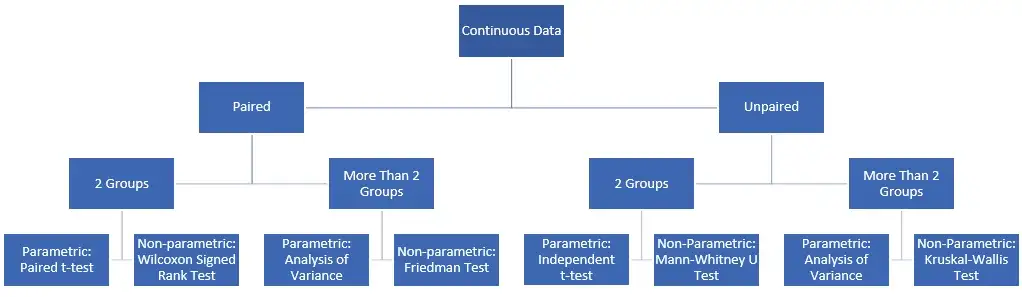


4. Decisión y Conclusión

---

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h2>Carga del Dataset</h2></b> 
</div>

In [2]:
league_data = pd.read_csv('Lligues europees UEFA.csv', sep=';', engine = 'python', encoding = "ISO-8859-1", index_col=0)
league_data

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


In [3]:
league_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

<h3>Observaciones:</h3>

    *  El dataset posee 98 filas y 20 columnas. 
    *  Se puede observar que se tienen variables tipos numéricas y de objetos o categoricas. 
    *  Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.    
    *  La columna "Top Team Scorer" indica el jugador que más goles anotó en el partido y la cantidad de goles, como es una variables que se puede analizar, se procederá a dividir en dos columnas. 

## 1. Preparación del Dataset

### 1.1. Creación de las columnas "Player Leader" y  "Score_Player"

In [4]:
#Creation of the year column and extract the value of the title column
league_data['Player Leader'], league_data['Score_Player'] = league_data['Top Team Scorer'].str.split(' - ',1).str
league_data.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Player Leader,Score_Player
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,...,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson,Kevin De Bruyne,15
2,Liverpool,ENG,2,36,26,8,2,89,24,65,...,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson,Mohamed Salah,22
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,...,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois,Karim Benzema,27
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,...,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer,Robert Lewandowski,35
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,...,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas,Kylian Mbappé,25


### 1.2. Eliminación de la columna "Top Team Scorer"

In [5]:
league_data.drop(columns = ['Top Team Scorer'], inplace = True)
league_data.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Player Leader,Score_Player
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
2,Liverpool,ENG,2,36,26,8,2,89,24,65,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25


In [6]:
league_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Squad          98 non-null     object 
 1   Country        98 non-null     object 
 2   LgRk           98 non-null     int64  
 3   MP             98 non-null     int64  
 4   W              98 non-null     int64  
 5   D              98 non-null     int64  
 6   L              98 non-null     int64  
 7   GF             98 non-null     int64  
 8   GA             98 non-null     int64  
 9   GD             98 non-null     int64  
 10  Pts            98 non-null     int64  
 11  Pts/G          98 non-null     float64
 12  xG             98 non-null     float64
 13  xGA            98 non-null     float64
 14  xGD            98 non-null     float64
 15  xGD/90         98 non-null     float64
 16  Last 5         98 non-null     object 
 17  Attendance     98 non-null     int64  
 18  Goalkeeper  

### 1.3. Convertir la variable "Score_Player" de objetos a numérica.

In [7]:
league_data['Score_Player'] = league_data['Score_Player'].astype('int64')

In [8]:
league_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Squad          98 non-null     object 
 1   Country        98 non-null     object 
 2   LgRk           98 non-null     int64  
 3   MP             98 non-null     int64  
 4   W              98 non-null     int64  
 5   D              98 non-null     int64  
 6   L              98 non-null     int64  
 7   GF             98 non-null     int64  
 8   GA             98 non-null     int64  
 9   GD             98 non-null     int64  
 10  Pts            98 non-null     int64  
 11  Pts/G          98 non-null     float64
 12  xG             98 non-null     float64
 13  xGA            98 non-null     float64
 14  xGD            98 non-null     float64
 15  xGD/90         98 non-null     float64
 16  Last 5         98 non-null     object 
 17  Attendance     98 non-null     int64  
 18  Goalkeeper  

### 1.4 Verificar nulos y NaM

In [9]:
league_data.isnull().sum()

Squad            0
Country          0
LgRk             0
MP               0
W                0
D                0
L                0
GF               0
GA               0
GD               0
Pts              0
Pts/G            0
xG               0
xGA              0
xGD              0
xGD/90           0
Last 5           0
Attendance       0
Goalkeeper       0
Player Leader    0
Score_Player     0
dtype: int64

In [10]:
league_data.isna().sum()

Squad            0
Country          0
LgRk             0
MP               0
W                0
D                0
L                0
GF               0
GA               0
GD               0
Pts              0
Pts/G            0
xG               0
xGA              0
xGD              0
xGD/90           0
Last 5           0
Attendance       0
Goalkeeper       0
Player Leader    0
Score_Player     0
dtype: int64

<h4> Como se pueden observar no hay valores faltantes ni NAN en el dataset. La gráfica es una manera visual de verificar la distribucción de los valores faltantes en un dataset. </h4>

<AxesSubplot:>

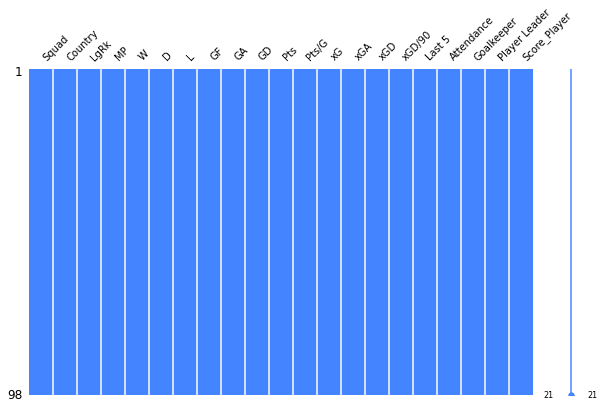

In [11]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(league_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 1.5 Verificar Duplicados

In [12]:
league_data.loc[league_data.duplicated()]

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Player Leader,Score_Player
Rk,,,,,,,,,,,,,,,,,,,,,


### 1.6 Reemplazar valores

In [13]:
league_data['Country'] = league_data['Country'].replace(['ENG'], 'England')
league_data['Country'] = league_data['Country'].replace(['ESP'], 'Spain')
league_data['Country'] = league_data['Country'].replace(['FRA'], 'France')
league_data['Country'] = league_data['Country'].replace(['GER'], 'Germany')
league_data['Country'] = league_data['Country'].replace(['ITA'], 'Italy')

In [14]:
league_data.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Player Leader,Score_Player
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,England,1,37,28,6,3,96,24,72,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
2,Liverpool,England,2,36,26,8,2,89,24,65,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
3,Real Madrid,Spain,1,37,26,7,4,80,31,49,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
4,Bayern Munich,Germany,1,34,24,5,5,97,37,60,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
5,Paris S-G,France,1,37,25,8,4,85,36,49,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25


<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.      

### 1.7 Análisis estadistico y visualización global  de las variables

In [15]:
league_data.describe(include = 'O').T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,England,20
Last 5,98,80,W W W L L,4
Goalkeeper,98,98,Ederson,1
Player Leader,98,98,Kevin De Bruyne,1


In [16]:
league_data.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
LgRk,98.0,10.316,5.707,1.00,5.250,10.00,15.000,20.00
MP,98.0,36.306,1.152,34.00,36.000,37.00,37.000,37.00
W,98.0,13.449,5.747,3.00,9.000,13.00,17.000,28.00
D,98.0,9.408,2.903,3.00,7.000,9.00,11.000,16.00
L,98.0,13.449,5.123,2.00,10.000,13.00,17.000,26.00
GF,98.0,50.878,16.103,23.00,39.000,47.00,60.000,97.00
GA,98.0,50.878,13.635,24.00,40.000,50.00,59.000,89.00
GD,98.0,0.000,26.502,-56.00,-17.750,-1.00,17.250,72.00
Pts,98.0,49.735,16.166,18.00,37.000,46.00,61.750,90.00
Pts/G,98.0,1.370,0.444,0.53,1.000,1.30,1.695,2.43


<h3>Observaciones:</h3>

 *  El dataset muestra 98 equipos que participan en la Liga Champion de Europa, distribuido en 5 paises, siendo Inglaterra el pais como mayor participación.  
 * Manchester City se encuentra en top N°1 de la liga.
 * La media de los partidos jugados es de 36.306, con una mínima de 34 y una máxima de 37, por lo que se infiere que los partidos jugados por los equipos fue equitativa.

* **Exploración gráfica**

Se seleccionaran las variables de interes en el estudio.

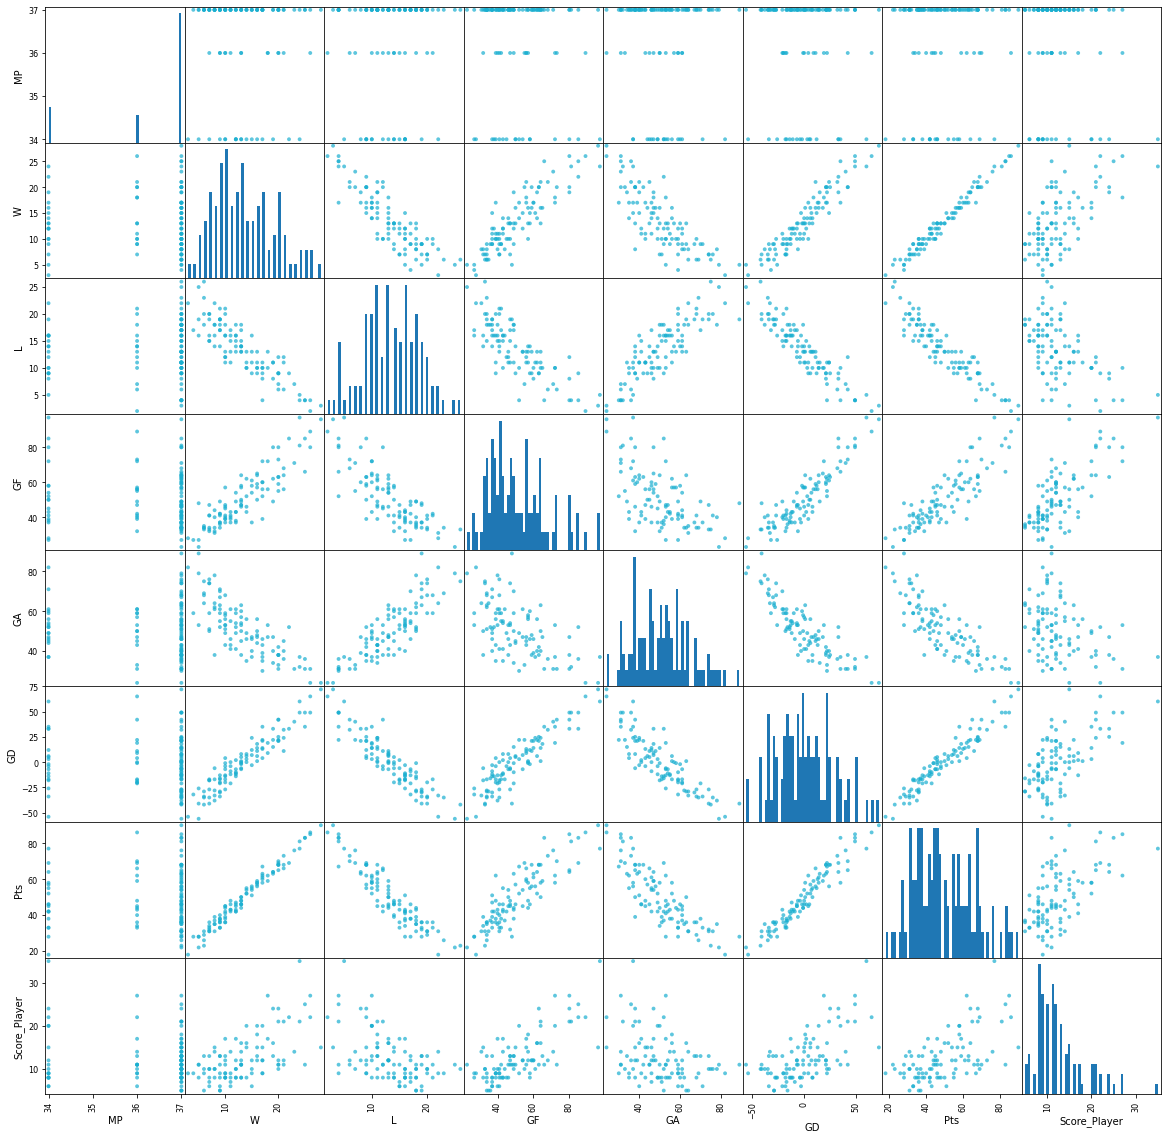

In [17]:
# pairplots Scatter

pd.plotting.scatter_matrix(league_data[['MP','W', 'L', 'GF', 'GA', 'GD', 'Pts', 'Score_Player']], figsize= (20,20),  
                           hist_kwds = {'bins': 50}, alpha = 0.7 , s = 60, color = '#1aafd0'); 

* Se observa que la mayoría de los datos podrían seguir una distribución normal, con corrrelaciones positivas y negativas.

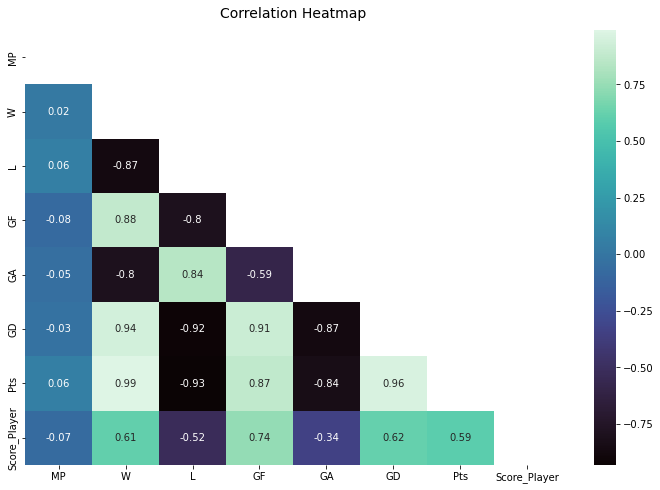

In [18]:
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(league_data[['MP','W', 'L', 'GF', 'GA', 'GD', 'Pts', 'Score_Player']].corr().round(2))) 

ax= sns.heatmap(league_data[['MP','W', 'L', 'GF', 'GA', 'GD', 'Pts', 'Score_Player']].corr().round(2), annot = True, 
                cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede ver que las variables en el conjunto de datos están tan fuertemente correlacionados postivamente o negativamente. Se puede ver que una mayor correlación entre las variables "W" y "Pts".
</div>

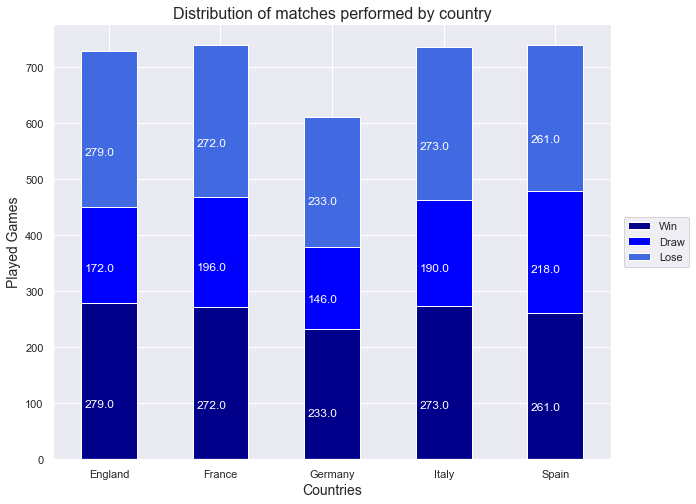

In [19]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create DF to Games played Total
total_played = league_data.groupby('Country')['W', 'D', 'L'].sum()

# Rename labels
total_played.rename(columns = {'W':'Win', 'D':'Draw', 'L':'Lose' }, inplace = True)

# create stacked bar chart 
ax = total_played.plot(kind='bar', stacked=True, color=['darkblue', 'blue', 'royalblue'], figsize=(10,8))
 
# create  
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 3
    label_y = y + height / 3
    ax.text(label_x, label_y, label_text, ha='center', 
            va='baseline', color='white')
    
# labels for x & y axis
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Played Games', fontsize=14)

# Label legend
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))

# Labels for titles
plt.title('Distribution of matches performed by country', fontsize=16)

# Rotate tick label
plt.xticks(rotation='horizontal')     

# show the graph
plt.show()

Se puede observar la distribucción de los partidos jugados entre los paises participantes, en donde se observa una distribucción equitativa, a excepción de Alemania, que obtuvo 100 menos con respecto al resto de los paises.

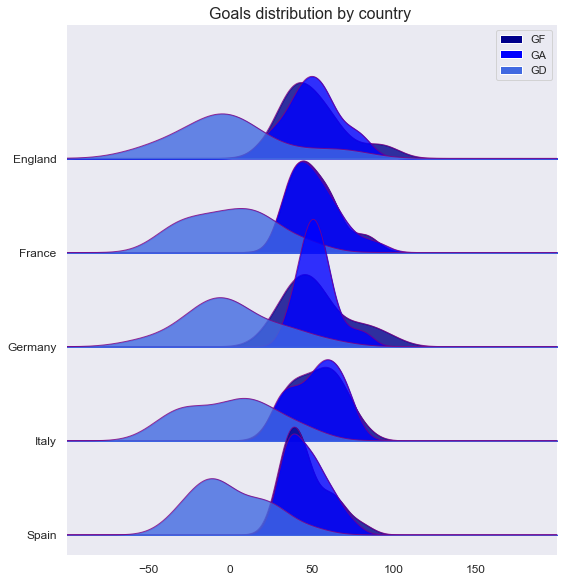

In [20]:
# Create stacked bar chart 
fig_6, axes = joypy.joyplot(data= league_data.groupby('Country')['GF', 'GA', 'GD'] , by='Country',  
                    column = ['GF', 'GA', 'GD'], color = ['darkblue', 'blue', 'royalblue', 'red'], 
                    linecolor="purple", legend=True, fill=True,linewidth=1, figsize=(8,8), x_range=[-100,200], alpha = 0.8)

ax.legend(loc='center right', bbox_to_anchor=(1.15, 1.5))

plt.title("Goals distribution by country ",  fontsize = 16)
plt.show()

La gráfica muestra la distrubución de los goles a favor, en contra y su diferencia por pais, la distribución parece más cercana a una distribución normal.

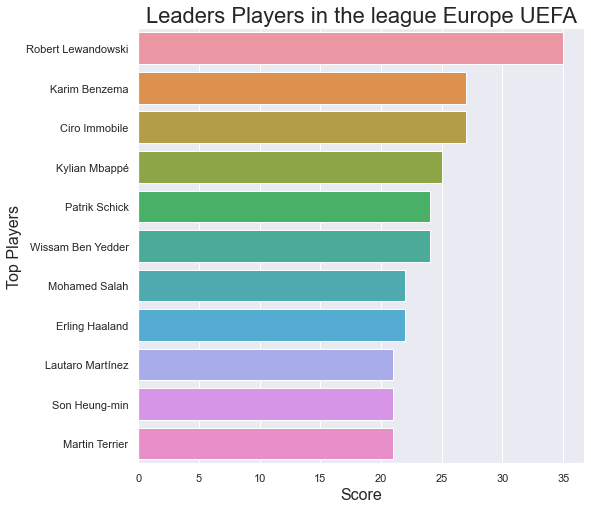

In [21]:
#Top players score graph
fig_dims = (8,8)
fig, ax = plt.subplots(figsize= fig_dims)
ax= sns.barplot(data=league_data[league_data['Score_Player']>20].sort_values(by='Score_Player', ascending=False), 
                y="Player Leader", x="Score_Player", orient ='h' )
# labels for x & y axis
plt.xlabel('Score', fontsize=16)
plt.ylabel('Top Players', fontsize=16)
# title of plot
plt.title('Leaders Players in the league Europe UEFA', fontsize=22)
plt.show()

Se muestra los máximos goleadores durante la temporada, estando entre los primeros lugares Robert Lewandowski, Karim Bezema y Ciro Immobile. 

<div class="alert alert-info">
    <strong>Ejercicio N°1: </strong> Seleccionar un atributo del conjunto de datos. Calcular el p-valor y verificar si se rechaza la hipótesis nula escogiendo un alfa de 5%.
  </div>

En este ejercicio, se comprobará si el promedio de puntos obtenidos **("Pts")** por los equipos de España es igual al promedio de puntos obtenidos del resto de los paises que participaron en la liga europea UEFA.

#### 1. Definir la Hipotesis:
* Comprobar la media puntos obtenidos**("Pts")** de los partidos jugados por los equipos de España es igual a la media de puntos obtenidos por el resto de los paises que participaron en la liga europea UEFA.

* H0 = Las medias son iguales

* H1 = Las medias son diferentes

* Alpha = 0.05 (5%)

* Para que la prueba sea independiente se calcula la media y la varianza de los puntos obtenidos por parte de los equipos participante, excluyendo el equipo de España.

In [22]:
df_League_no_Spain = league_data[league_data['Country'] != 'Spain']
mean_df_League_no_Spain = round(df_League_no_Spain.Pts.mean(), 3)
mean_df_League_no_Spain

49.654

In [23]:
variance_df_League_no_Spain = df_League_no_Spain.Pts.var()
variance_df_League_no_Spain

271.3981018981019

In [24]:
# create a new dataframe for Spain Teams: 
df_League_Spain = league_data[league_data['Country'] == 'Spain']
df_League_Spain.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Player Leader,Score_Player
Rk,,,,,,,,,,,,,,,,,,,,,
3,Real Madrid,Spain,1,37,26,7,4,80,31,49,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
10,Barcelona,Spain,2,37,21,10,6,68,36,32,...,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Marc-André ter Stegen,Memphis Depay,12
17,Atlético Madrid,Spain,3,37,20,8,9,63,42,21,...,1.84,51.0,30.9,20.1,0.56,D L W W D,48039,Jan Oblak,Ángel Correa Luis Suárez,11
19,Sevilla,Spain,4,37,17,16,4,52,30,22,...,1.81,42.0,36.8,5.2,0.14,W D D D D,29669,Yassine Bounou,Rafa Mir,9
21,Betis,Spain,5,37,19,7,11,62,40,22,...,1.73,54.0,42.9,11.1,0.30,L D L W W,41749,Rui Silva,Juanmi,16


Adicionalmente se calcula la media y la varianza de los puntos obtenidos por parte de los equipos participante por parte de España.

In [25]:
mean_df_League_Spain = round(df_League_Spain.Pts.mean(),3)
mean_df_League_Spain

50.05

In [26]:
variance_df_League_Spain = round(df_League_Spain.Pts.var(),3)
variance_df_League_Spain

234.261

#### 2. Chequear las suposiciones:

* Comprobar si las observaciones en cada muestra son independientes e idénticamente distribuidas.

* Comprobar si la distribución de los puntos obtenidos por el Equipos de España sigue una distribución normal. Usaremos la prueba de normalidad de Shapiro-Wilk, que es generalmente para muestras pequeñas. La Hipótesis es:
     * H₀: Los datos se distribuyen normalmente.
     * H₁: los datos no se distribuyen normalmente.
        
* Las observaciones en cada muestra tienen la misma varianza.(Este punto no se analizará dado que solo se tiene una muestra).

In [28]:
# create a function that checks if the distribution is normal: 
def check_normal_distribution(data): 
    stat, p_value_norm = shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
    if p_value_norm < 0.05 : 
        mensaje = "Rechazar la hipótesis nula al 95 % de nivel de significancia > Los datos no se distribuyen normalmente."
    else: 
        mensaje = "No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente."
    return mensaje

In [29]:
check_normal_distribution(df_League_Spain['Pts'])

stat=0.919, p=0.096


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

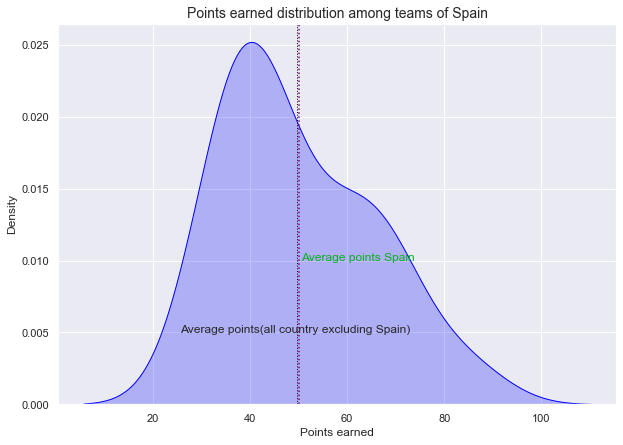

In [30]:
plt.figure(figsize= (10,7))

sns.kdeplot(df_League_Spain['Pts'], label= 'Pts', color= 'blue', fill = True)

plt.axvline(x= mean_df_League_no_Spain, linewidth = 1, color= 'black', ls= 'dotted')
plt.axvline(x= mean_df_League_Spain, color = 'purple', ls = 'dotted')

plt.xlabel('Points earned', fontsize=12)

plt.text(x= 25.5, y=0.005, s= "Average points(all country excluding Spain)")
plt.text(x= 50.5, y = 0.010, s= 'Average points Spain', color= '#08b01f')

plt.title('Points earned distribution among teams of Spain', fontsize=14)

plt.show()

Se puede ver que tanto el grafico y el resultado de la prueba estadisticas, con un nivel de confianza del 95% los datos se distribuyen normalmente.

#### 3. Selección de la prueba:

* Dado que se cumplen las suposiciones, se aplicará el **t-test** para la versión paramétrica de la prueba para 2 grupos y datos no apareados.
* En este caso pues, para aplicar el t-test se necesitan poner dos atributos, utilizaré los puntos obtenidos por equipo de España y los puntos obtenidos por el resto de los paises.
* La prueba t-test independiente se utilizase cuando se obtienen dos conjuntos separados de muestras independientes e idénticamente distribuidas, y se compara una variable de cada una de las dos poblaciones.

In [31]:
#the Student's t-test for independences samples
stat, p = ttest_ind(df_League_no_Spain['Pts'], df_League_Spain['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente la misma distribución')
else:
 print('Probablemente diferentes distribuciones')

stat=-0.097, p=0.923
Probablemente la misma distribución


#### 4. Conclusiones:

* p-value = 0.923

* Claramente podemos ver que p-value > alpha 0.923 > 0.05

* Se puede indicar que se acepta la hipótesis nula (H0) con un alfa de 0.05.

* Por tanto, los puntos obtenidos de los equipos de España son equivalentes a las medias de los puntos obtenidos por el resto de los paises que participaron en la liga UEFA.

<div class="alert alert-info">
    <strong>Ejercicio N°2: </strong> Seleccionar otros dos atributos del conjunto de datos. Calcular los p-valores y verificar si se rechazan la hipótesis nula escogiendo un alfa de 5%.
  </div>

En este ejercicio, se comprobará si la variables de los goles a favor **("GF")** y la variable de la goles en contra **("GA")** obtenidos por los equipos participantes siguen una misma distribución normal.

#### 1. Definir la Hipotesis:

* Comprobar si la variables de los goles a favor **("GF")** y la variable de la goles en contra **("GA")** obtenidos por los equipos participantes siguen una misma distribución normal:

    * H0 = Siguen distribución normal

    * H1 = No siguen distribució normal

* Alpha = 0.05 (5%)

* La distribución gráfica de las variables a evaluar:

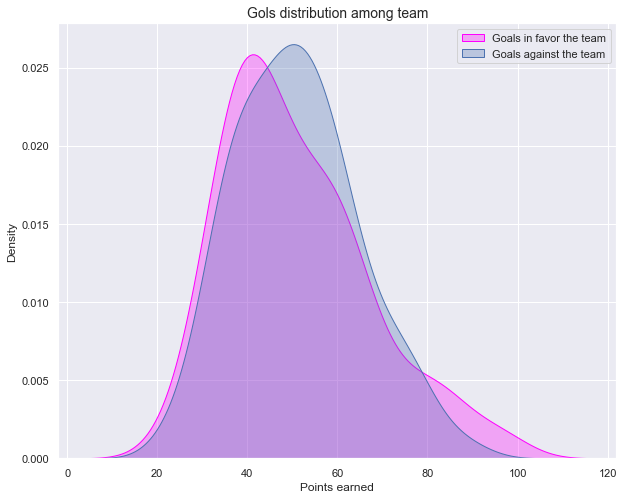

In [32]:
plt.figure(figsize= (10,8))

sns.kdeplot(league_data['GF'], label= 'Goals in favor the team', color= 'magenta', fill = True, alpha = 0.30)
sns.kdeplot(league_data['GA'], label= 'Goals against the team', fill = True, alpha= 0.30)

plt.xlabel('Points earned', fontsize=12)
plt.title('Gols distribution among team', fontsize=14)
plt.legend()
plt.show()

#### 2. Chequear las suposiciones:

* Comprobar si las observaciones en cada muestra son independientes e idénticamente distribuidas.

* Comprobar si la distribución de los goles a favor y en contra siguen una distribución normal. Se usará la prueba de normalidad de Shapiro-Wilk, que es generalmente para muestras pequeñas. La Hipótesis es:
     *  H₀: Los datos se distribuyen normalmente.
     *  H₁: los datos no se distribuyen normalmente.
        
* Las observaciones en cada muestra tienen la misma varianza.

In [33]:
# check normal distribution of Goals favors (GF)
check_normal_distribution(league_data['GF'])

stat=0.943, p=0.000


'Rechazar la hipótesis nula al 95 % de nivel de significancia > Los datos no se distribuyen normalmente.'

In [34]:
# check normal distribution of Goals against (GA)
check_normal_distribution(league_data['GA'])

stat=0.983, p=0.243


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

In [35]:
## Define a function to check variance for checking variance homogeneity
# Levene’s test  

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rechaza la hipótesis nula >> Las varianzas de las muestras son diferentes")
    else:
        print("No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas")

In [36]:
check_variance_homogeneity(league_data['GF'], league_data['GA'])

p value:0.1996
No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas


Se observa que no cumple una de las 3 suposiones, el resultado es que una de las muestras sigue una distribución normal pero la otra no, por lo que en esta ocasión se utilizara la prueba no paramétrica **U de Mann-Whitney**.

#### 3. Selección de la prueba:

* Los datos no siguen una distribución normal, aunque las varianzas son similares, por tanto se utilizará un test para datos no-paramétricos.
* Se utilizará **U Mann-Whitney** para testear si las distribuciones de dos variables son iguales o no.

In [37]:
## Mann White U test
stat, p_value = mannwhitneyu(league_data['GF'], league_data['GA'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print('Probablemente la misma distribución.')
else:
    print('Probablemente diferentes distribuciones.')

 Mann–Whitney U Test: statistic=4620.5000, p-value=0.6484
Probablemente la misma distribución.


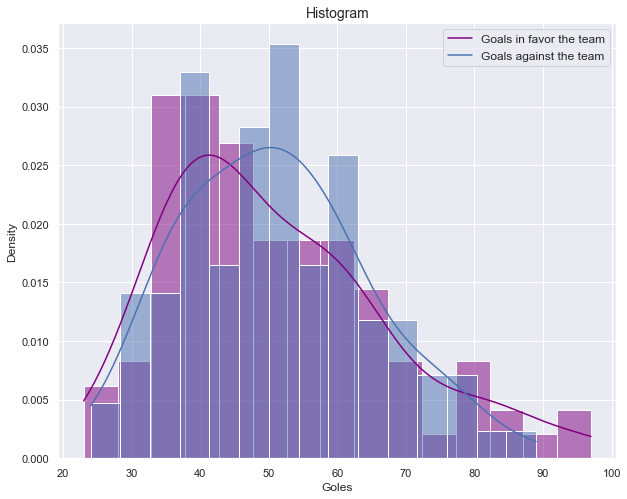

In [38]:
plt.figure(figsize= (10,8))

ax= sns.histplot(data=league_data, x='GF', bins=15, color='purple', kde= True, stat='density')
ax= sns.histplot(data=league_data, x='GA', bins=15, kde= True, stat='density')

plt.legend(loc=1, mode='upper right', fancybox = True,fontsize='medium', 
           labels=['Goals in favor the team', 'Goals against the team'])

plt.xlabel('Goles', fontsize=12)
plt.title("Histogram", fontsize=14)
plt.show()

#### Conclusiones:

* p-value = 0.6484

* Claramente podemos ver que p-value > alpha, 0.684 > 0.05.

* Se puede indicar que se acepta la hipótesis nula (H0) con un alfa de 0.05.

* De acuerdo a los resultados obtenidos probablemente tienen la misma distribución, asi como tambien lo muestra el grafico de histogramas, aunque previamente fue rechazada en en el chequeo de las suposiones. 

* Se infiere que los datos de la variables goles a favor ("GF") posea valores atipicos o converjan en el quartil superior, tal como se observa en el gráfico de abajo. 

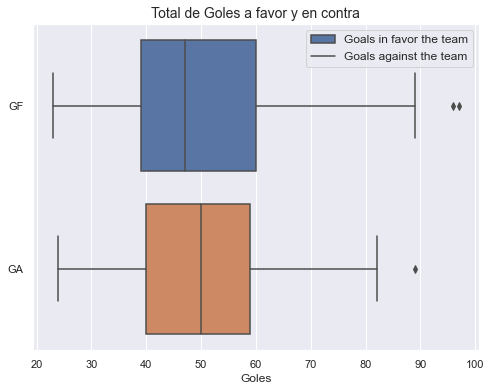

In [39]:
plt.figure(figsize= (8,6))

ax= sns.boxplot(data=league_data[['GF', 'GA']], orient="h")

plt.legend(loc=1, fancybox = True, fontsize='medium', 
           labels=['Goals in favor the team', 'Goals against the team'])

plt.xlabel('Goles', fontsize=12)
plt.title("Total de Goles a favor y en contra", fontsize=14)

plt.show()

<div class="alert alert-info">
    <strong>Ejercicio N°3: </strong> Seleccionar otros tres atributos del conjunto de datos. Calcular los p-valores y verificar si se rechazan la hipótesis nula escogiendo un alfa de 5%.
  </div>

En esta ocasión se comparará los juegos ganados **("W)** entre el scores de los goleadores, en función del grupo y se chequeraá si existe relación entre las medianas. Se asumió las siguientes premisas para definir el grupo del puntaje **("Score_Group")**: 
   * Score_Player <= 10 : Lower Score
   * Score_Player > 10 and < 20: Medium Score
   * Score_Player <= 20 : High Score

#### 1. Definir Hipotesis

* Comprobar las medias de los juegos ganados entre el scores de los goleadores: 
     * H0 = μ₁=μ₂=μ₃ Las medias son iguales
     * H1 = Las medias son diferentes

* Alpha = 0.05 (5%)

* Se creará una columna definiendo los rangos de los puntajes

In [40]:
league_data.loc[(league_data['Score_Player'] <= 10), 'Score_group'] = 'Lower Score'
league_data.loc[(league_data['Score_Player'] > 10) & (league_data['Score_Player'] < 20), 'Score_group'] = 'Medium Score'
league_data.loc[(league_data['Score_Player'] >= 20), 'Score_group'] = 'High Score'
league_data.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Player Leader,Score_Player,Score_group
Rk,,,,,,,,,,,,,,,,,,,,,
1,Manchester City,England,1,37,28,6,3,96,24,72,...,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15,Medium Score
2,Liverpool,England,2,36,26,8,2,89,24,65,...,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22,High Score
3,Real Madrid,Spain,1,37,26,7,4,80,31,49,...,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27,High Score
4,Bayern Munich,Germany,1,34,24,5,5,97,37,60,...,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35,High Score
5,Paris S-G,France,1,37,25,8,4,85,36,49,...,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25,High Score


* Se crearan 3 dataset nuevos para comprobar la hipótesis

In [41]:
lower_data = league_data[(league_data['Score_group'] == 'Lower Score')]
medium_data = league_data[(league_data['Score_group'] == 'Medium Score')]
high_data = league_data[(league_data['Score_group'] == 'High Score') ]

In [42]:
print ("Número de columnas y filas: ", lower_data.shape)
print ("Número de columnas y filas: ", medium_data.shape)
print ("Número de columnas y filas: ", high_data.shape)

Número de columnas y filas:  (41, 22)
Número de columnas y filas:  (43, 22)
Número de columnas y filas:  (14, 22)


En vista que los nuevos datset no tienen la misma cantidad de muestras, se procedera a seleccionar 14 valores aleatorio para los dataset lower_data y medium_data, dado que high_data tiene el valor minimo.

In [43]:
lower_data_s = league_data.sample(n= 14)
medium_data_s = league_data.sample(n= 14)

In [44]:
print ("Número de columnas y filas: ", lower_data_s.shape)
print ("Número de columnas y filas: ", medium_data_s.shape)

Número de columnas y filas:  (14, 22)
Número de columnas y filas:  (14, 22)


#### 2. Chequear las suposiciones:

* Comprobar si las observaciones en cada muestra son independientes e idénticamente distribuidas.

* Comprobar si la distribución de los partidos por grupo de score siguen una distribución normal. Se usará la prueba de normalidad de Shapiro-Wilk, que es generalmente para muestras pequeñas. La Hipótesis es:
     *  H₀: Los datos se distribuyen normalmente.
     *  H₁: los datos no se distribuyen normalmente.
        
* Las observaciones en cada muestra tienen la misma varianza.

* **Chequear la normalidad de la distribucción**

In [45]:
# check normal distribution Lower Score
check_normal_distribution(lower_data_s['W'])

stat=0.931, p=0.314


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

In [46]:
# check normal distribution medium Score
check_normal_distribution(medium_data_s['W'])

stat=0.973, p=0.913


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

In [47]:
# check normal distribution high Score
check_normal_distribution(high_data['W'])

stat=0.955, p=0.634


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

* **Chequear si las varianzas de los atributos son similares entre ellas utiliza el test Levene.**

In [48]:
## Check variance of 3 atributes
stat, pvalue_levene= stats.levene(lower_data_s['W'], medium_data_s['W'], high_data['W'])
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Rechazar hipótesis nula >> Las varianzas de las muestras son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas.")

p value:0.2619
No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas.


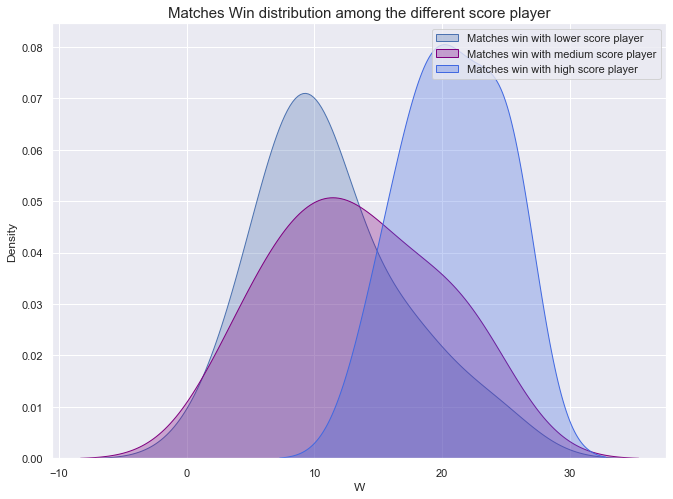

In [49]:
plt.figure(figsize= (11,8))

sns.kdeplot(lower_data_s['W'],  label= 'Matches win with lower score player', fill = True, alpha= 0.30)
sns.kdeplot(medium_data_s['W'], label= 'Matches win with medium score player', color= 'purple', fill = True, alpha = 0.30)
sns.kdeplot(high_data['W'], label= 'Matches win with high score player', fill = True, alpha= 0.30, color='royalblue')

plt.title('Matches Win distribution among the different score player', fontsize = 15)
plt.legend()
plt.show()

Dado que se cumplen las suposiciones, podemos realizar la versión paramétrica de la prueba para más de 2 grupos y datos no apareados.

#### 3. Selección de la prueba:

* Se selecciona la prueba ANOVA (f Oneway) Dado que se cumplen las suposiciones.
* Prueba ANOVA utilizada para comparar las medias de más de 2 grupos.
* ANOVA utiliza la prueba F basada en la varianza para verificar la igualdad de la media del grupo

In [50]:
F, p_value = stats.f_oneway(lower_data_s['W'],medium_data_s['W'],high_data['W'])
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Rechazar hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

p value:0.000078
Rechazar hipótesis nula


#### 4. Conclusiones:

* El valor de p obtenido del análisis ANOVA es significativo (p < 0.05), por lo que concluye que existen diferencias significativas entre los grupos.
* A este nivel de significanca, se puede concluir que al menos uno de los grupos tiene una ganancia mayor juegos.

* Para encontrar qué grupo o grupos causan la diferencia, se requiere realizar una prueba post hoc/comparación por pares como se muestra a continuación:

In [51]:
# pip install scikit-posthocs
# Pairwise T test for multiple comparisons of independent groups. 
# May be used after a parametric ANOVA to do pairwise comparisons.
# To avoid family-wise p-value inflation, I used Bonferroni adjustment.

import scikit_posthocs as sp
posthoc_df= sp.posthoc_ttest([lower_data_s['W'],medium_data_s['W'],high_data['W']], equal_var=True, p_adjust="bonferroni")

group_names= ["lower score", "medium score","high score"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,lower score,medium score,high score
lower score,1.000000,1.000000,0.000057
medium score,1.000000,1.000000,0.002172
high score,0.000057,0.002172,1.000000


A este nivel de significación, se puede concluir que: 
* “lower score” es diferente a “high score”.
* "medium score" es diferente de "high score". 
* "high score" es diferente de "lower score" y "medium score".